In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from abc import abstractmethod
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import phik
from typing import Literal
import umap
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [96]:
df = pd.read_csv('data/taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [97]:
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


<Axes: xlabel='Trip_Distance_km', ylabel='Count'>

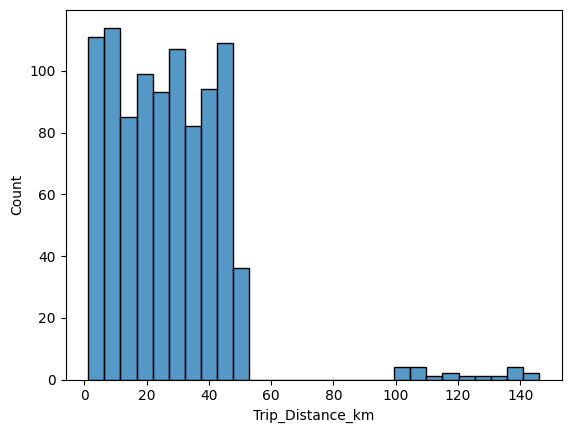

In [98]:
sns.histplot(df['Trip_Distance_km'])

<Axes: xlabel='Time_of_Day', ylabel='Count'>

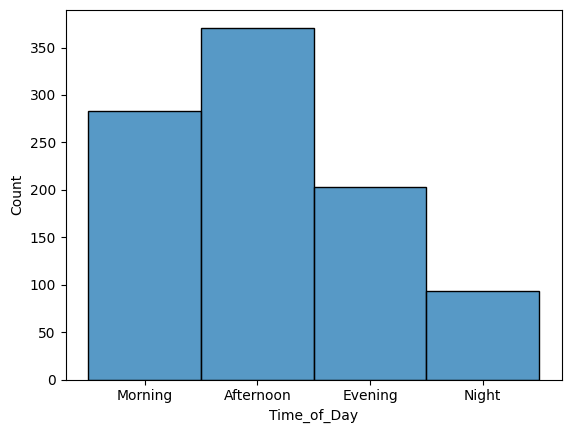

In [99]:
sns.histplot(df['Time_of_Day'])

<Axes: xlabel='Day_of_Week', ylabel='Count'>

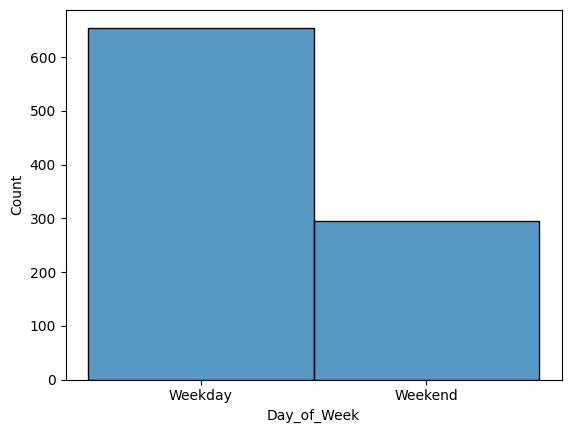

In [100]:
sns.histplot(df['Day_of_Week'])

<Axes: xlabel='Passenger_Count', ylabel='Count'>

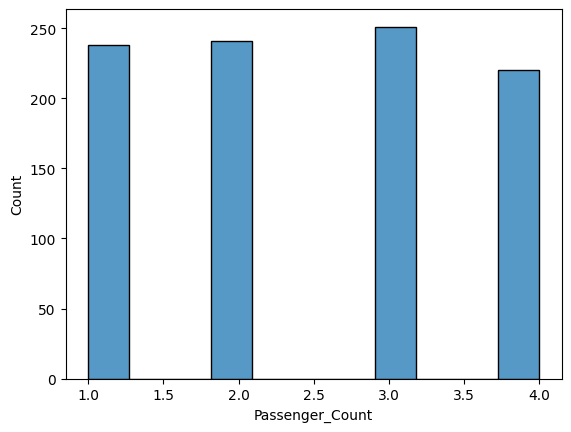

In [101]:
sns.histplot(df['Passenger_Count'])

interval columns not set, guessing: ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


<Axes: >

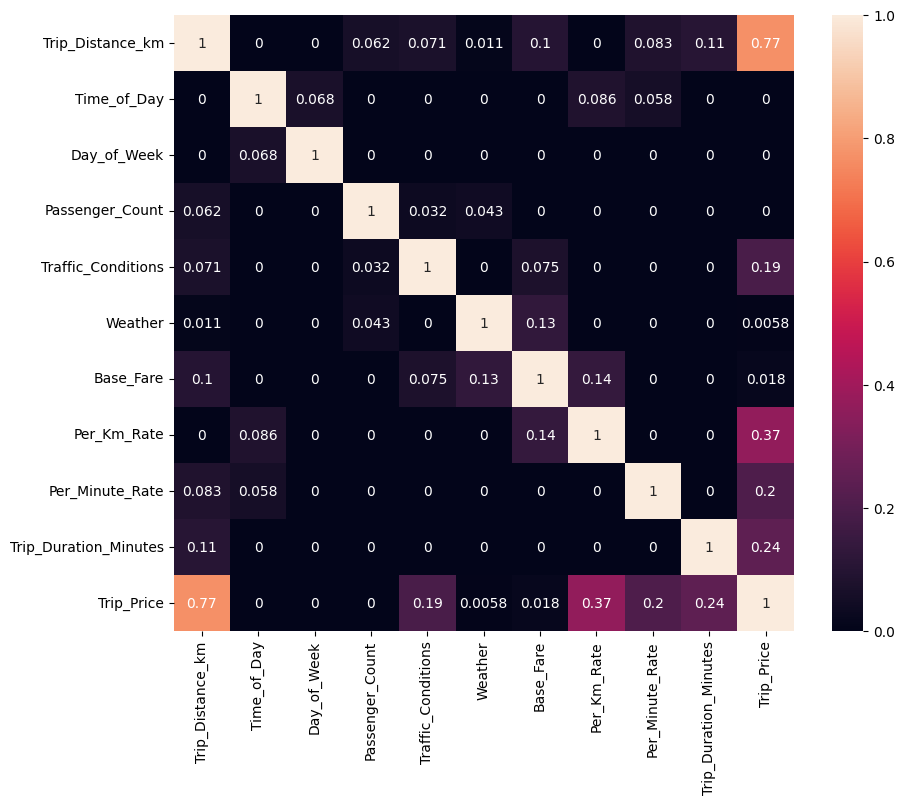

In [102]:
plt.figure(figsize=(10, 8))
report = df.phik_matrix()
sns.heatmap(report, annot=True)

In [103]:
# profile = ProfileReport(df)
# profile.to_file('report_regression.html')

In [104]:
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


In [105]:
df['Trip_Distance_km'].mode()

0     3.00
1     3.22
2     9.91
3    10.14
4    13.64
5    25.63
6    31.29
7    32.04
Name: Trip_Distance_km, dtype: float64

In [106]:
df_filled = df.apply(lambda col: col.fillna(col.mode()[0]))
df_filled

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.94,0.62,0.43,40.57,6.1269
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698
4,3.00,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.15,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.15,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [107]:
cat_cols = list(df_filled.select_dtypes(include=['object']).columns)

In [108]:
df_filled['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [109]:
def encode(x):
    if x == 'Morning':
        x = 1
    elif x == 'Afternoon':
        x = 2
    elif x == 'Evening':
        x = 3
    elif x == 'Night':
        x = 4
    elif x == 'Weekday':
        x = 0
    elif x == 'Weekend':
        x = 1
    elif x == 'Low':
        x = 1
    elif x == 'Medium':
        x = 2
    elif x == 'High':
        x = 3
    elif x == 'Clear':
        x = 1
    elif x == 'Rain':
        x = 2
    elif x == 'Snow':
        x = 3
    return x
    
    

In [110]:
df_filled[cat_cols] = df_filled[cat_cols].map(encode)

In [111]:
df_filled

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,1,0,3.0,1,1,3.56,0.80,0.32,53.82,36.2624
1,47.59,2,0,1.0,3,1,3.94,0.62,0.43,40.57,6.1269
2,36.87,3,1,1.0,3,1,2.70,1.21,0.15,37.27,52.9032
3,30.33,3,0,4.0,1,1,3.48,0.51,0.15,116.81,36.4698
4,3.00,3,0,3.0,3,1,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,2,1,4.0,2,1,2.39,0.62,0.49,58.39,34.4049
996,45.95,4,0,4.0,2,1,3.12,0.61,0.15,61.96,62.1295
997,7.70,1,0,3.0,1,2,2.08,1.78,0.15,54.18,33.1236
998,47.56,1,0,1.0,1,1,2.67,0.82,0.17,114.94,61.2090


In [115]:
X = df_filled.drop(columns='Trip_Price')
y = df_filled['Trip_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [116]:
X_train

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
703,7.59,2,0,2.0,3,1,3.95,0.67,0.25,59.78
311,4.84,3,0,3.0,2,2,4.96,0.58,0.12,51.22
722,4.26,2,1,4.0,1,1,2.57,0.70,0.14,66.19
629,13.37,2,0,2.0,1,2,2.85,1.92,0.19,114.32
0,19.35,1,0,3.0,1,1,3.56,0.80,0.32,53.82
...,...,...,...,...,...,...,...,...,...,...
106,21.11,2,1,4.0,3,2,4.61,0.69,0.18,84.06
270,40.66,2,0,2.0,2,1,3.90,0.67,0.30,34.29
860,39.00,3,1,1.0,1,1,2.19,1.56,0.43,64.81
435,35.35,1,0,1.0,2,1,4.20,1.21,0.15,79.01


In [117]:
y_train

703    23.9803
311    13.9136
722    14.8186
629    50.2412
0      36.2624
        ...   
106    34.3067
270    41.4292
860    90.8983
435    58.8250
102    53.9332
Name: Trip_Price, Length: 670, dtype: float64

In [118]:
pt = PowerTransformer()
X_train = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

In [119]:
X_train

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,-1.042795,-0.012585,-0.659310,-0.437090,1.429647,-0.635727,0.469655,-1.257155,-0.274539,-0.044324
1,-1.384670,0.976067,-0.659310,0.488517,0.550092,1.541532,1.717033,-1.517256,-1.498336,-0.314835
2,-1.470627,-0.012585,1.516737,1.367331,-1.048927,-0.635727,-1.163718,-1.172954,-1.299748,0.153529
3,-0.519656,-0.012585,-0.659310,-0.437090,-1.048927,1.541532,-0.839829,1.532018,-0.820276,1.546616
4,-0.116459,-1.391614,-0.659310,0.488517,-1.048927,-0.635727,-0.000948,-0.900628,0.325376,-0.231844
...,...,...,...,...,...,...,...,...,...,...
665,-0.013860,-0.012585,1.516737,1.367331,1.429647,1.541532,1.280349,-1.200887,-0.914299,0.687582
666,0.861421,-0.012585,-0.659310,-0.437090,0.550092,-0.635727,0.408957,-1.257155,0.157766,-0.876915
667,0.800026,0.976067,1.516737,-1.429641,-1.048927,-0.635727,-1.596344,0.847202,1.197956,0.111246
668,0.658518,-1.391614,-0.659310,-1.429641,0.550092,-0.635727,0.774695,0.102830,-1.201947,0.539013


In [120]:
X_test

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,-0.097952,1.748818,-0.659310,-0.437090,-1.048927,-0.635727,1.218336,1.179608,1.273439,1.293601
1,0.874148,-1.391614,-0.659310,-1.429641,0.550092,-0.635727,0.469655,1.311667,1.121866,-1.526111
2,0.125686,0.976067,-0.659310,-1.429641,0.550092,1.705135,1.466947,1.179608,0.811234,-0.566391
3,-0.171325,-0.012585,-0.659310,1.367331,0.550092,-0.635727,-1.289798,0.907123,1.642040,1.413777
4,1.099455,-1.391614,-0.659310,1.367331,-1.048927,-0.635727,1.491890,1.621691,-0.099276,0.985313
...,...,...,...,...,...,...,...,...,...,...
325,1.035957,-0.012585,1.516737,1.367331,-1.048927,1.541532,-0.000948,0.302801,0.967823,-0.695042
326,-0.849312,0.976067,-0.659310,-1.429641,0.550092,-0.635727,-1.494635,-1.228954,-1.398538,-0.927867
327,1.019716,-0.012585,1.516737,0.488517,1.429647,-0.635727,-1.764770,-1.371331,1.045158,0.717970
328,0.440513,-1.391614,-0.659310,-0.437090,0.550092,-0.635727,-1.392450,-1.008065,0.967823,1.519247


In [122]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(X_train)
embedding.shape

/opt/anaconda3/envs/regressionparams/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(670, 2)

In [126]:
embedding = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding

,UMAP1,UMAP2
0,1.355965,1.910040
1,7.101491,0.243813
2,5.612585,6.173928
3,8.377848,0.952432
4,1.660514,3.651967
...,...,...
665,7.214032,3.145629
666,2.033641,0.465343
667,5.429165,5.497091
668,0.325667,2.007634


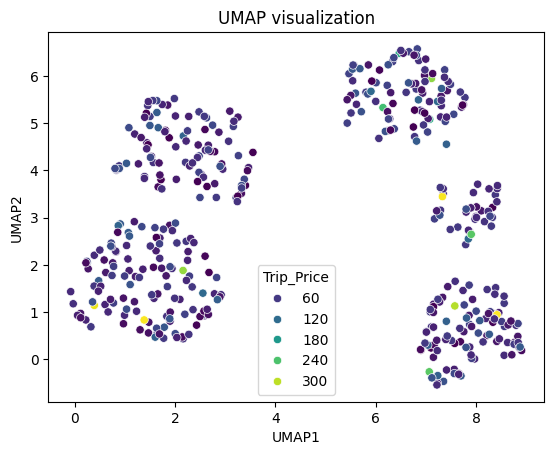

In [129]:
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding, hue=y_train, palette='viridis')
plt.title("UMAP visualization")
plt.show()

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

In [160]:
def random_optimization_regression(x_train, x_test, Y_train, Y_test, mod: Literal['DecisionTree', 'RandomForest', 'XGBoost']):

    mses = []
    maes = []
    params_list = []
    count = 0
    
    if mod == 'DecisionTree':

        for i in range(15):
            params = {
            'criterion': np.random.choice(['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'splitter': np.random.choice(['best', 'random']),
            'max_depth': np.random.randint(3, 50),
            'min_samples_split': np.random.randint(2, 20),
            'min_samples_leaf': np.random.randint(1, 10),
            'min_weight_fraction_leaf': np.random.uniform(0.0, 0.5),
            'max_features': np.random.choice([None, 'sqrt', 'log2']),
            'random_state': 42,
            'max_leaf_nodes': np.random.choice([None] + list(np.random.randint(10, 300, size=10))),
            'min_impurity_decrease': np.random.uniform(0.0, 0.2),
            'ccp_alpha': np.random.uniform(0.0, 0.2)}
            
            i += 1
            
            model = DecisionTreeRegressor(**params)
            model.fit(x_train, Y_train)
            y_pred = model.predict(x_test)
            
            mae = np.log(mean_absolute_error(Y_test, y_pred))
            mse = np.log(mean_squared_error(Y_test, y_pred))

            mses.append(mse)
            maes.append(mae)
            params_list.append(params)
            
    elif mod == 'RandomForest':
        
        for i in range(15):
            params = {
            'n_estimators': np.random.randint(50, 500),
            'criterion': np.random.choice(['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
            'max_depth': np.random.randint(3, 50),
            'min_samples_split': np.random.randint(2, 20),
            'min_samples_leaf': np.random.randint(1, 10),
            'min_weight_fraction_leaf': np.random.uniform(0.0, 0.5),
            'max_features': np.random.choice([None, 'sqrt', 'log2']),
            'random_state': 42,
            'max_leaf_nodes': np.random.choice([None] + list(np.random.randint(10, 300, size=10))),
            'min_impurity_decrease': np.random.uniform(0.0, 0.2),
            'bootstrap': np.random.choice([True, False]),
            'oob_score': np.random.choice([True, False]),
            'ccp_alpha': np.random.uniform(0.0, 0.2),
            'max_samples': np.random.choice([None] + list(np.random.uniform(0.5, 1.0, size=5)))}
            if params['bootstrap']:
                params['max_samples'] = np.random.uniform(0.5, 1.0)
            else:
                params['max_samples'] = None
                params['oob_score'] = False 
                
            i += 1
            
            model = RandomForestRegressor(**params)
            model.fit(x_train, Y_train)
            y_pred = model.predict(x_test)
            
            mae = np.log(mean_absolute_error(Y_test, y_pred))
            mse = np.log(mean_squared_error(Y_test, y_pred))

            mses.append(mse)
            maes.append(mae)
            params_list.append(params)
            
        
        
    elif mod == 'XGBoost':
        for i in range(15):
            params = {
            'n_estimators': np.random.randint(50, 500),
            'learning_rate': np.random.uniform(0.01, 0.3),
            'max_depth': np.random.randint(3, 15),
            'min_child_weight': np.random.randint(1, 10),
            'gamma': np.random.uniform(0.0, 5.0),
            'subsample': np.random.uniform(0.5, 1.0),
            'colsample_bytree': np.random.uniform(0.5, 1.0),
            'reg_alpha': np.random.uniform(0.0, 0.1),
            'reg_lambda': np.random.uniform(0.0, 1.0),
            'random_state': 42}
            
            dtrain = xgb.DMatrix(data=x_train, label=Y_train)
            dtest = xgb.DMatrix(data=x_test, label=Y_test)  
            model = xgb.XGBRegressor(**params)
            model.fit(x_train, Y_train)
            y_pred = model.predict(x_test)
            mae = np.log(mean_absolute_error(Y_test, y_pred))
            mse = np.log(mean_squared_error(Y_test, y_pred))

            mses.append(mse)
            maes.append(mae)
            params_list.append(params)


    for i in range(len(params_list)):
        params_list[i] = list(params_list[i].values())
        
        for x in range(len(params_list[i])):
            if isinstance(params_list[i][x], float):
                params_list[i][x] = round(params_list[i][x], 2)
            params_list[i][x] = str(params_list[i][x])
            params_list[i][x] += '\n'
        params_list[i] = ''.join(params_list[i])
        
    listed = list(params.keys())
    for d in range(len(listed)):
        listed[d] += '\n'
        string = ''.join(listed)
    # График
    plt.figure(figsize=(22, 6))
    plt.plot(range(1, 16), mses, marker='o', label='logMSE')
    plt.plot(range(1, 16), maes, marker='s', label='logMAE')
    plt.xlabel('Iteration')
    plt.ylabel('Score')
    plt.title('Decision Tree Performance over 15 Runs')
    plt.plot([], [], label=f"Parameters:\n {string}")
    plt.legend(loc='lower left')
    plt.xticks(range(1, 16), params_list)
    plt.show()


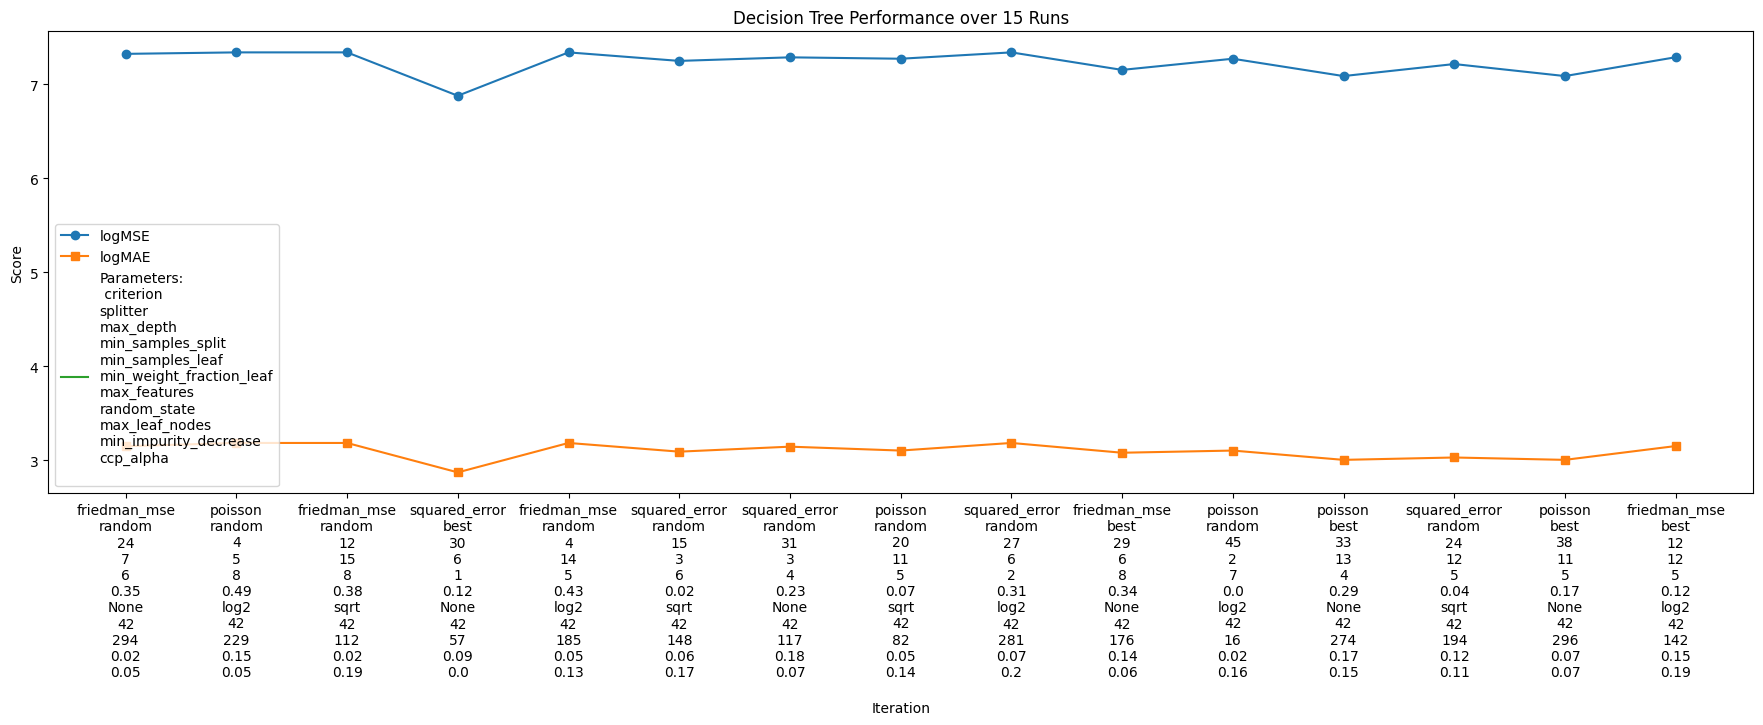

In [161]:
random_optimization_regression(X_train, X_test, y_train, y_test, mod='DecisionTree')

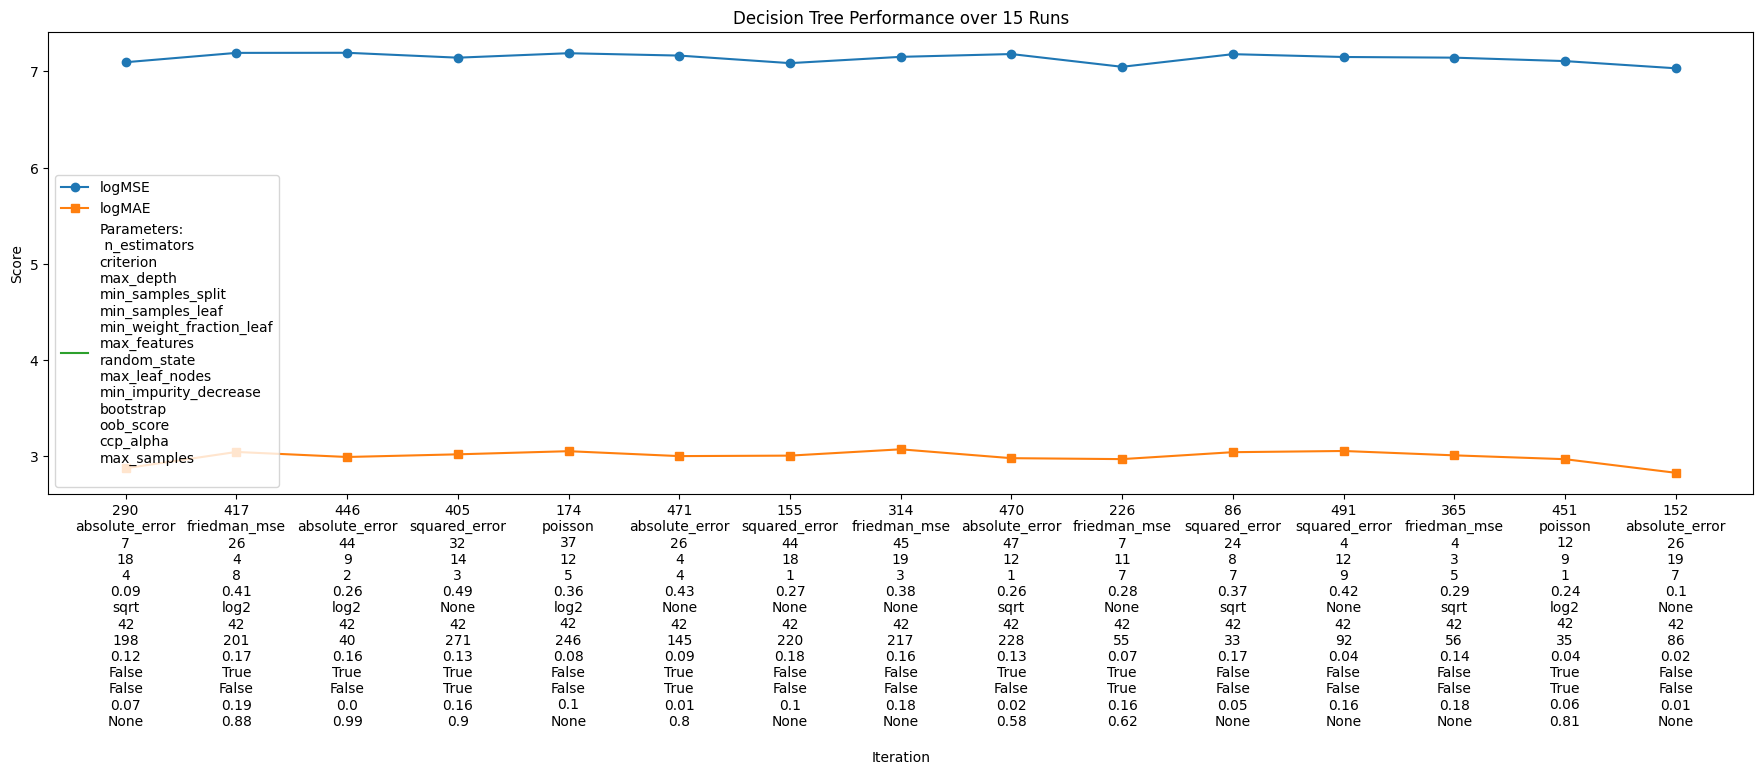

In [162]:
random_optimization_regression(X_train, X_test, y_train, y_test, mod='RandomForest')

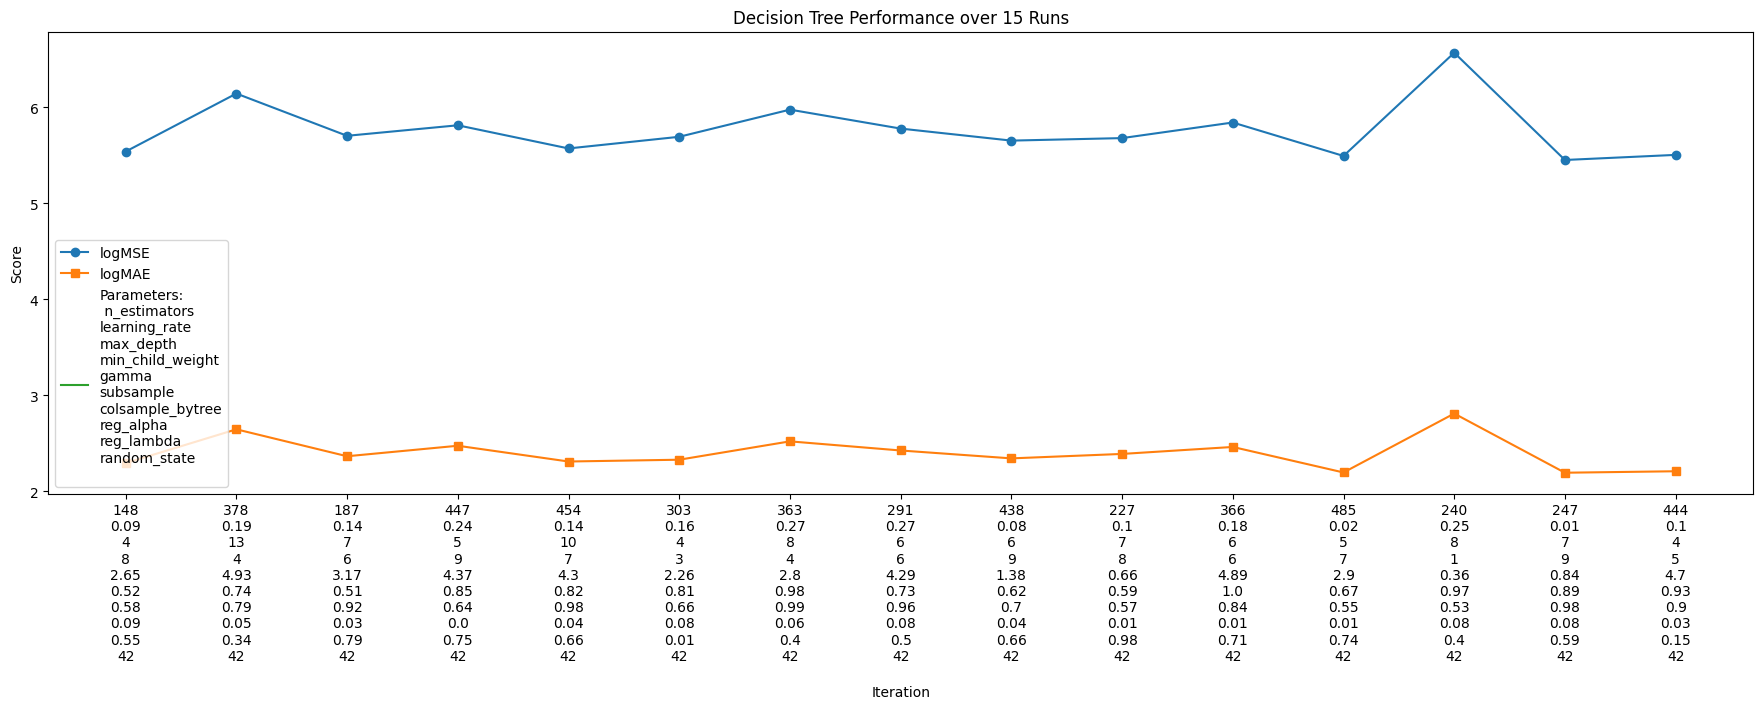

In [163]:
random_optimization_regression(X_train, X_test, y_train, y_test, mod='XGBoost')